# Vibration in Recycle Gas Compressor of a Diesel Hydrotreater Unit

## This notebook is under development!

The data available to study the vibration in the recycle gas compressor C-28501 is given in three *.csv files. Each file comprises a different timestamp, as given below, and I'm using the largest one as the train dataset:

| Filename       | Timestamp (dd/mm hh:mm)   |
|--------|-------|---------------|-----------|
|   test_data1   | 08/02 12:00 -> 17/02 09:10|
|   test_data2   |  17/02 20:35 -> 04/03 16:00|
|   train_data3  | 08/03 16:35 -> 02/04 06:00|

In [1]:
# IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Acquiring Data ###

# Reading the csv file, separator is ';' and 'Bad Input' occurs
# when the instrument fails to measure or register the value.
test_data1 = pd.read_csv('test_data1.csv', sep=';', na_values='Bad Input')
test_data2 = pd.read_csv('test_data2.csv', sep=';', na_values='Bad Input')
train_data3 = pd.read_csv('train_data3.csv', sep=';', na_values='Bad Input')    

In [2]:
# Pre-visuzalization of test_data1
test_data1.head()

,FIC28501,TI28601,FIC28502,TI28602,FIC28503,TI28603,PIC28730,FIC28505,FIC28505O,TI28531,...,PI28900,PI28903,PI28897,FI28572,FI28573,TI5683654,XI28551,VXI28502,VYI28502,VIB_LA_AVG
0,453.64151,26.72335,0.0,25.82083,149.91644,30.99281,6.50586,0.0,0.0,92.60288,...,0.07730,1.00225,1.08754,1.64455,1.96279,31.17857,9984.2666,30.91039,37.45520,34.18280
1,453.06583,26.76746,0.0,25.91382,139.61769,31.03798,6.49996,0.0,0.0,92.57228,...,0.07762,1.00393,1.08958,1.64094,1.98489,31.46428,9984.2666,30.98944,37.57776,34.28360
2,452.71371,26.81157,0.0,26.00680,143.36543,31.08315,6.49523,0.0,0.0,92.54169,...,0.07640,1.00463,1.08852,1.63732,2.00698,31.75000,9984.2666,31.06849,37.70032,34.38440
3,452.71371,26.86244,0.0,26.09979,147.11317,31.12833,6.49094,0.0,0.0,92.51109,...,0.07519,1.00463,1.08621,1.63371,2.02908,31.89865,9984.2666,31.14753,37.82288,34.48520
4,452.48959,26.91942,0.0,26.19277,150.86093,31.17351,6.49585,0.0,0.0,92.48049,...,0.07646,1.00184,1.08711,1.63010,2.05117,31.08784,9984.2666,31.22658,37.94544,34.58601


In [3]:
# Pre-visuzalization of test_data2
test_data2.head()

,FIC28501,TI28601,FIC28502,TI28602,FIC28503,TI28603,PIC28730,FIC28505,FIC28505O,TI28531,...,PI28900,PI28903,PI28897,FI28572,FI28573,TI5683654,XI28551,VXI28502,VYI28502,VIB_LA_AVG
0,2067.31641,56.47026,0.0,30.70442,2540.19238,197.12959,6.60953,4505.50342,41.08472,134.40190,...,0.06945,1.04941,1.12979,1.1886,1.90924,28.0,8959.96094,29.38207,36.32504,32.85356
1,2022.71362,56.43086,0.0,30.67441,2554.33423,197.21051,6.52930,4503.82861,41.08563,134.69911,...,0.07005,1.05088,1.13115,1.1886,1.90152,28.0,8959.96094,29.38012,36.33889,32.85950
2,2005.71790,56.40598,0.0,30.64439,2550.30298,197.29143,6.49187,4502.15332,41.10813,134.99634,...,0.06954,1.05047,1.13426,1.1886,1.89380,28.0,8959.96094,29.37816,36.35273,32.86545
3,1986.76770,56.42276,0.0,30.61438,2546.27148,197.37234,6.49316,4500.47803,41.13191,135.29356,...,0.06962,1.04791,1.13273,1.1886,1.88607,28.0,8959.96094,29.37621,36.36658,32.87140
4,1962.10754,56.43954,0.0,30.58201,2545.11719,197.45326,6.49494,4499.00342,41.16014,135.59077,...,0.07004,1.04869,1.13223,1.1886,1.87835,28.0,8959.96094,29.37425,36.38043,32.87734


In [4]:
# Pre-visuzalization of train_data3
train_data3.head()

,DATE,FIC28501,TI28601,FIC28502,TI28602,FIC28503,TI28603,PIC28730,FIC28505,FIC28505O,...,PI28900,PI28903,PI28897,FI28572,FI28573,TI5683654,XI28551,VXI28502,VYI28502,VIB_LA_AVG
0,03-08-18 16:35:00,218.6138,27.07687,0.0,28.05599,149.44453,29.56839,6.51331,0.0,0.0,...,0.06986,1.17335,1.24684,1.13050,0.84554,32.0,1492.42932,6.45947,7.32420,6.89183
1,03-08-18 16:40:00,218.6138,27.09085,0.0,28.06234,147.80458,29.55710,6.51370,0.0,0.0,...,0.06906,1.18245,1.25882,1.14011,0.86987,32.0,1514.76147,6.45894,7.29343,6.87618
2,03-08-18 16:45:00,218.6138,27.10483,0.0,28.06870,146.16463,29.54581,6.51372,0.0,0.0,...,0.06945,1.18466,1.25832,1.14972,0.89420,32.0,1537.09351,6.45841,7.26266,6.86053
3,03-08-18 16:50:00,218.6138,27.11405,0.0,28.07505,145.67049,29.53451,6.51360,0.0,0.0,...,0.06945,1.18201,1.25444,1.15933,0.91853,32.0,1559.42554,6.45788,7.23189,6.84488
4,03-08-18 16:55:00,218.6138,27.11896,0.0,28.08140,145.36546,29.52322,6.50876,0.0,0.0,...,0.06833,1.15988,1.23736,1.16895,0.94286,32.0,2906.74731,6.45735,7.75481,7.10608


In [5]:
# Dropping Date Column of train_data3
train_data = train_data3.drop(['DATE'], axis=1)

raw_datalist = [test_data1, test_data2, train_data]

# Dropping rows if all columns are NA and setting datasets to float type
for i, dataset in enumerate(raw_datalist):
    dataset.dropna(axis=0, how='all', inplace=True)
    dataset.astype(dtype='float64')

# Concatenating test_data1 and test_data2 in one test_data dataframe
test_data = pd.concat([test_data1, test_data2], ignore_index=True)
print('train shape = ' + str(train_data.shape))
print('test shape = ' + str(test_data.shape))

train shape = (7074, 97)
test shape = (6753, 97)


## Cleaning Data

The fisrt step is to reduce data dimension by removing duplicate features
and combine features that are strogly related or are redundant.

As I'm familiar with the plant process and the compressor operation,
I've came up with some features that are related according to its
position in the process.

### Temperature Features

Feed Temperature features
These features are related with temperature of feed components (heavy and light diesel,
light cycle oil, coker gasoil, mixture in the feed vessel):
- 'TI28531','TI28601', 'TI28602', 'TI28603','TI28606'

Features related with reactors temperatures (inlet, outlet, reactor beds, etc...):
- 'TI28693', 'TI28697', 'TI28696', 'TI28694', 'TI28691', 'TI28517', 'TI28612', 'TI28630', 'TI28510', 'TIC28511','TIC28530', 'TIC28650', 'TIC28515', 'TIC28680', 'TI28699', 'TI28700'

Differential temperaturs in reactor beds:
- 'TDI28640', 'TDI28530', 'TDI28650', 'TDI28670', 'TDI28680'

Bushing temperatures:
- 'TI28795', 'TI28796', 'TI28797', 'TI28798'

Lub Oil temperature fatures:
- 'TI28787', 'TI28877'


### Flow Features
Compressor discharge flow (reduntant)
- 'FI28507A', 'FI28507B'

Gas flow for reactors (redundant)
- 'FI28508A', 'FI28508B', 'FI28508C'

Reactor quench flows
- 'FIC28511', 'FIC28512', 'FIC28513', 'FIC28514'

Seal gas flow
- 'FI28572', 'FI28573'

### Pressure Features
Oil pressure features
- 'PI28611', 'PI28612', 'PI28903', 'PI28897'

First and second seal pressures
- 'PI28914A', 'PI28914B'
- 'PI28899', 'PI28900'

### Level Features
High Pressure Separator Vessel
- 'LI28508', 'LI28509A', 'LI28509B'

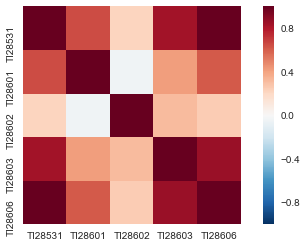

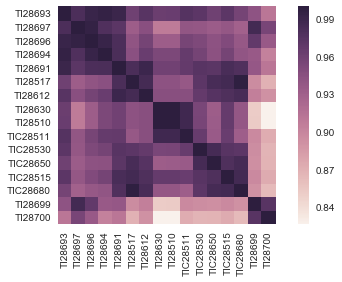

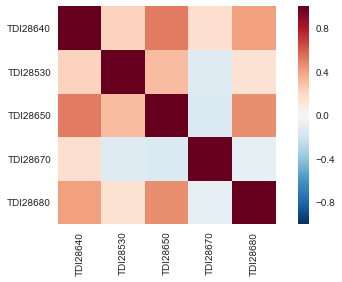

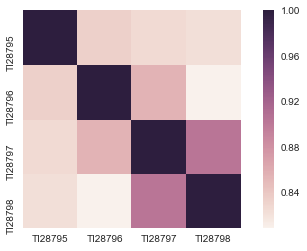

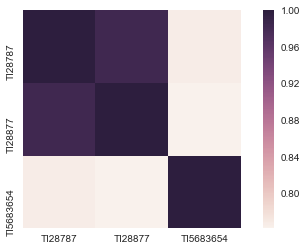

In [6]:
### TEMPERATURE FEATURES ###

# Feed temperature correlation
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['TI28531','TI28601', 'TI28602','TI28603','TI28606']].corr(), square=True);

# Reactor temperature correlation
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['TI28693', 'TI28697', 'TI28696', 'TI28694', 
                        'TI28691', 'TI28517', 'TI28612', 'TI28630', 
                        'TI28510', 'TIC28511','TIC28530','TIC28650',
                        'TIC28515', 'TIC28680', 'TI28699', 'TI28700']].corr(), square=True);

# Differential temperature in reactors correlation
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['TDI28640', 'TDI28530', 'TDI28650', 'TDI28670', 'TDI28680']].corr(), square=True);

# Bushing temperature correlation
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['TI28795', 'TI28796', 'TI28797', 'TI28798']].corr(), square=True);

# Oil temperature correlation
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['TI28787', 'TI28877', 'TI5683654']].corr(), square=True)

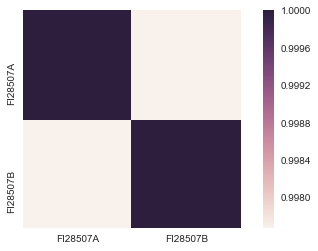

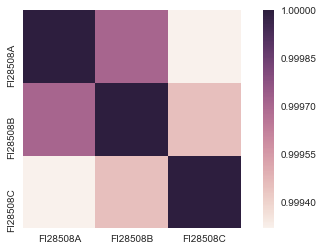

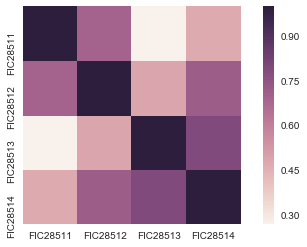

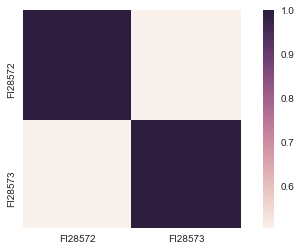

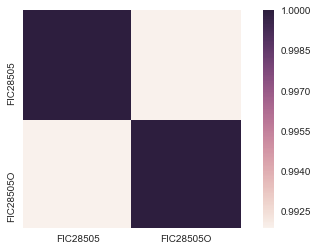

In [7]:
### FLOW FEATURES ###

# Discharge flow features
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['FI28507A', 'FI28507B']].corr(), square=True);

# Gas flow for reactors
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['FI28508A', 'FI28508B', 'FI28508C']].corr(), square=True);

# Reactor quench gas flow
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['FIC28511', 'FIC28512', 'FIC28513', 'FIC28514']].corr(), square=True);

# Seal gas flow
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['FI28572', 'FI28573']].corr(), square=True);

# Reactor feed flow
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['FIC28505', 'FIC28505O']].corr(), square=True);

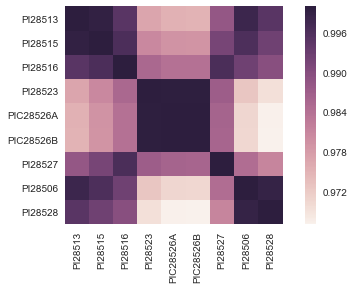

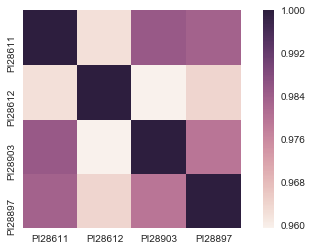

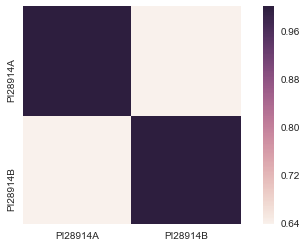

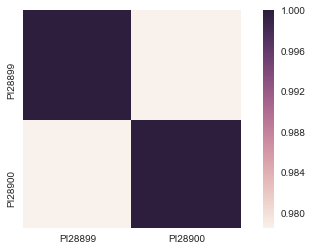

In [8]:
### PRESSURE FEATURES ###

# Reactor pressure features
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['PI28513', 'PI28515', 'PI28516', 'PI28523', 'PIC28526A',
                        'PIC28526B', 'PI28527', 'PI28506', 'PI28528']].corr(), square=True);

# Lub oil pressure
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['PI28611', 'PI28612', 'PI28903', 'PI28897']].corr(), square=True);

# First seal pressure
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['PI28914A', 'PI28914B']].corr(), square=True);

# Second seal pressure
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['PI28899', 'PI28900']].corr(), square=True);

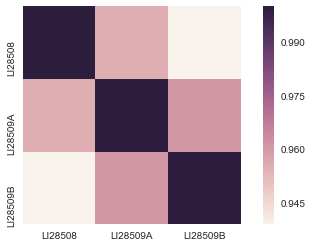

In [9]:
### LEVEL FEATURE ###

# High Pressure Separator Vessel
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(train_data[['LI28508', 'LI28509A', 'LI28509B']].corr(), square=True);

In [10]:
### Cleaning Data ###

# Given the Pearson correlation heatmaps above the features below will not be used in their groups:
# TI28602 (Feed temperature group)
# TDI28670 (Reactor differential temperature group)

# The following function will be used to join the rest of the features and clean the datasets

def join_features(dataset):
    # Feed temperature features
    feed_temp_feat = ['TI28531','TI28601', 'TI28603','TI28606']
    FEED_T = dataset[feed_temp_feat].mean(axis=1)
    
    # Reaction temperature features
    react_temp_feat = ['TI28693', 'TI28697', 'TI28696', 'TI28694', 'TI28691', 
                       'TI28517', 'TI28612', 'TI28630', 'TI28510', 'TIC28511',
                       'TIC28530', 'TIC28650', 'TIC28515', 'TIC28680', 'TI28699',
                       'TI28700']
    REACT_T = dataset[react_temp_feat].mean(axis=1)
    
    # Reactor Differential temperature features
    diff_temp_feat = ['TDI28640', 'TDI28530', 'TDI28650', 'TDI28680']
    DIFF_REACT_T = dataset[diff_temp_feat].mean(axis=1)
    
    # Bushing (mancal) temperature mean
    bushing_temp_feat = ['TI28795', 'TI28796', 'TI28797', 'TI28798']
    BUSHING_T = dataset[bushing_temp_feat].mean(axis=1)
    
    oil_temp_feat = ['TI28787', 'TI28877', 'TI5683654', 'TI28707']
    OIL_T = dataset[oil_temp_feat].mean(axis=1)
    
    # Compressor discharge flow features (same point)
    fi507_feat = ['FI28507A', 'FI28507B', 'FI28507X']
    FI28507 = dataset[fi507_feat].mean(axis=1)
    
    # Recycle gas for reactors features mean (same point)
    fi508_feat = ['FI28508A', 'FI28508B', 'FI28508C']
    FI28508 = dataset[fi508_feat].mean(axis=1)
    
    # Reactor quench flows sum
    quench_feat = ['FIC28511', 'FIC28512', 'FIC28513', 'FIC28514']
    QUENCH = dataset[quench_feat].sum(axis=1)
    
    # Seal gas flows sum
    seal_flow_feat = ['FI28572', 'FI28573']
    SEAL_FLOW = dataset[seal_flow_feat].sum(axis=1)
    
    # Reactor feed flow
    reactor_feed_feat = ['FIC28505', 'FIC28505O']
    FIC28505 = dataset[reactor_feed_feat].mean(axis=1)
    
    # Reactor pressure features
    react_pressure_feat = ['PI28513', 'PI28515', 'PI28516', 'PI28523', 'PIC28526A',
                          'PIC28526B', 'PI28527', 'PI28506', 'PI28528']
    REACTION_P = dataset[react_pressure_feat].mean(axis=1)
    
    # Lub oil pressure
    oil_pressure_feat = ['PI28611', 'PI28612', 'PI28903', 'PI28897', 'PI28606']
    OIL_LUB_P = dataset[oil_pressure_feat].mean(axis=1)
    
    # First and second seals pressure
    first_seal_feat = ['PI28914A', 'PI28914B']
    FIRST_SEAL_P = dataset[first_seal_feat].mean(axis=1)
    
    second_seal_feat = ['PI28899', 'PI28900']
    SECOND_SEAL_P = dataset[second_seal_feat].mean(axis=1)
    
    # Separator vessel level (same point)
    li508_feat = ['LI28508', 'LI28509A', 'LI28509B']
    LI28508 = dataset[li508_feat].mean(axis=1)
    
    new_features = [FEED_T, REACT_T, DIFF_REACT_T, BUSHING_T, FI28507, OIL_T,
                    FI28508, QUENCH, SEAL_FLOW, FIC28505, REACTION_P, OIL_LUB_P,
                    FIRST_SEAL_P, SECOND_SEAL_P, LI28508]
    
    new_features_list = ['FEED_T', 'REACT_T', 'DIFF_REACT_T', 'BUSHING_T', 'FI28507', 'OIL_T',
                         'FI28508', 'QUENCH', 'SEAL_FLOW', 'REACTOR_FEED', 'REACTION_P', 'OIL_LUB_P',
                         'FIRST_SEAL_P', 'SECOND_SEAL_P', 'LI28508']
    
    for i, feature in enumerate(new_features_list):
        dataset[feature] = new_features[i]
    
    features_to_drop = [feed_temp_feat, react_temp_feat, diff_temp_feat, bushing_temp_feat, oil_temp_feat,
                        fi507_feat, fi508_feat, quench_feat, seal_flow_feat, reactor_feed_feat,
                        react_pressure_feat, oil_pressure_feat, first_seal_feat, second_seal_feat,
                        li508_feat]
    
    for feature_list in features_to_drop:
        dataset.drop(feature_list, axis=1, inplace=True)
        
    # Filling NA with the previous valor in the row
    dataset.fillna(method='ffill', inplace=True)
    
    # Dropping 'VXI28502' and 'VYI28502' features (represented by its averegaed value VIB_LA_AVG)
    # Dropping TI28693.1 feature (duplicated)
    dataset.drop(['VXI28502', 'VYI28502', 'TI28693.1'], axis=1, inplace=True)    



for i, dataset in enumerate([train_data, test_data]):
    join_features(dataset)
    print('data'+str(i+1)+ ' shape = ', dataset.shape)

data1 shape =  (7074, 41)
data2 shape =  (6753, 41)


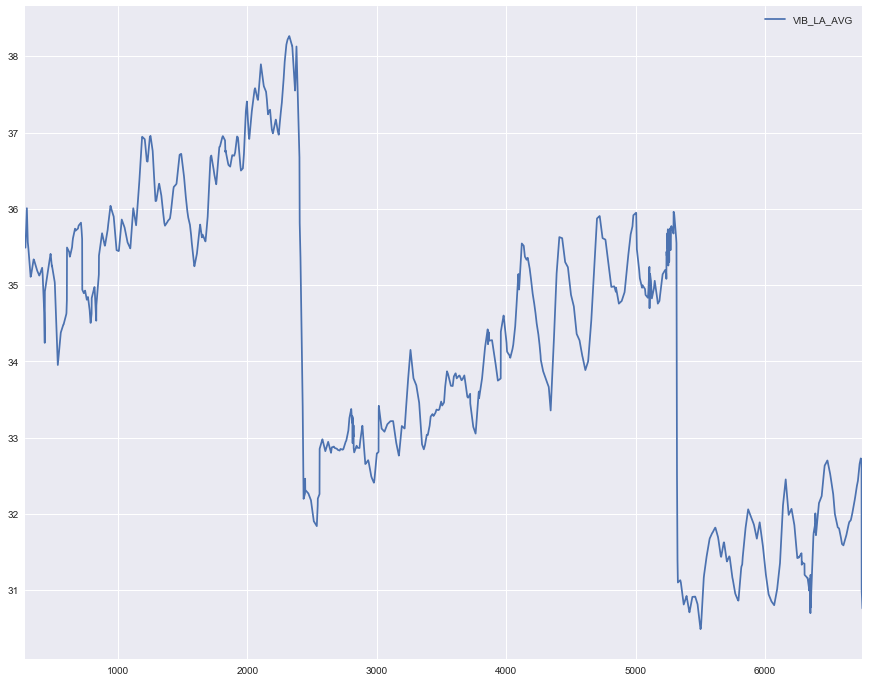

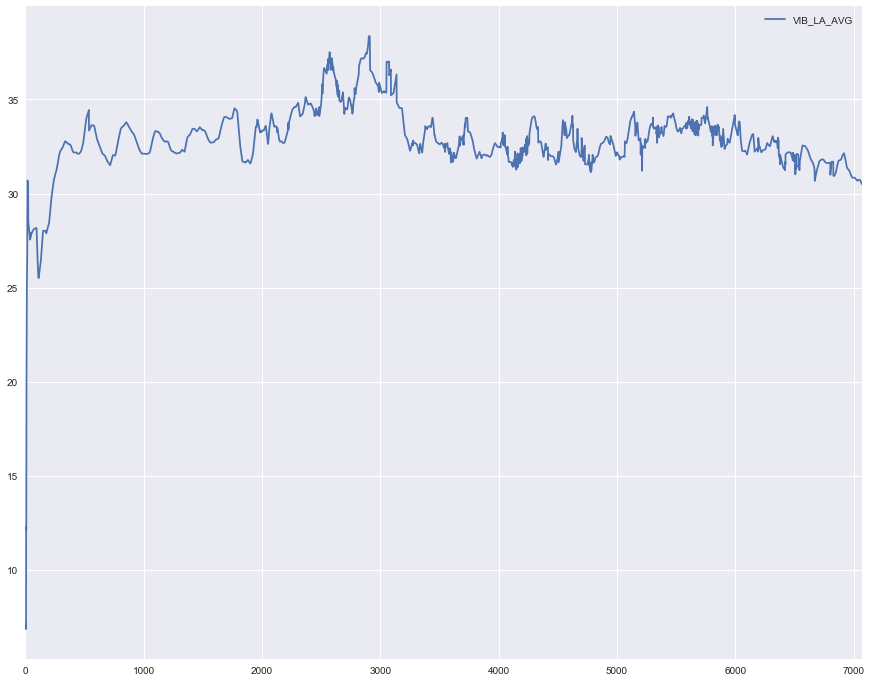

In [11]:
test_data = test_data[test_data.VIB_LA_AVG > 25][285:]
test_data[['VIB_LA_AVG']].plot(figsize=(15,12))
train_data[['VIB_LA_AVG']].plot(figsize=(15,12))

In [12]:
# Normalizing data
train_norm = train_data.copy()
test_norm = test_data.copy()

from sklearn.preprocessing import StandardScaler

train_norm = pd.DataFrame(StandardScaler().fit_transform(train_norm), columns=list(train_norm))
test_norm = pd.DataFrame(StandardScaler().fit_transform(test_norm), columns=list(test_norm))

train_norm.head()

,FIC28501,FIC28502,TI28602,FIC28503,PIC28730,PI28505,FFI28505,FIC28544O,TDI28670,FIC28525,...,FI28507,OIL_T,FI28508,QUENCH,SEAL_FLOW,REACTOR_FEED,REACTION_P,OIL_LUB_P,FIRST_SEAL_P,SECOND_SEAL_P
0,-4.533341,-0.028088,-0.867909,-4.865111,0.011109,-14.083218,4.705,-3.489828,-3.851393,-3.174789,...,-14.278039,-1.124372,-5.682611,-4.316435,-2.448144,-9.945723,-16.227564,4.534306,-1.429768,0.013665
1,-4.533341,-0.028088,-0.865471,-4.868575,0.015446,-14.083248,4.705,-3.489828,-3.809510,-3.175277,...,-14.273766,-1.174488,-5.682611,-4.327950,-2.365498,-9.945723,-16.073325,4.804102,-1.596200,-0.256488
2,-4.533341,-0.028088,-0.863029,-4.872039,0.015668,-14.083279,4.705,-3.489828,-3.767633,-3.175358,...,-14.266594,-1.219683,-5.682611,-4.339465,-2.282853,-9.945723,-15.849008,4.687447,-1.506743,-0.186771
3,-4.533341,-0.028088,-0.860591,-4.873083,0.014334,-14.083309,4.705,-3.489828,-3.725750,-3.174466,...,-13.832877,-1.241598,-5.700940,-4.350980,-2.200207,-9.945723,-15.538283,4.478018,-1.417286,-0.082196
4,-4.533341,-0.028088,-0.858154,-4.873727,-0.039489,-14.083339,4.705,-3.489828,-3.683873,-3.173111,...,-12.469908,-1.271885,-2.926780,-4.362495,-2.117537,-9.945723,-15.220956,3.700433,-1.327829,-0.331651


PIC28530        -0.502698
FFI28505        -0.497671
TI28883         -0.361251
OIL_LUB_P       -0.291612
SEAL_FLOW       -0.271017
FI28508         -0.257312
PI28531         -0.234262
PIC28526BO      -0.209492
PI28567         -0.200437
FIRST_SEAL_P    -0.150401
FIC28607        -0.104055
TDI28670        -0.087581
85GPPMMC1       -0.027356
PIC28730        -0.007551
FIC28502         0.007263
PI28617A         0.046443
TI28777          0.073827
SECOND_SEAL_P    0.155253
DIFF_REACT_T     0.201759
PI28505          0.212160
FIC28544O        0.293591
PIC28526AO       0.323364
FIC28525         0.386244
PI28895          0.406289
FI28507          0.446837
OIL_T            0.454868
FEED_T           0.467291
XI28551          0.487982
FIC28501         0.504249
TI28602          0.507930
BUSHING_T        0.541166
FIC28503         0.557483
TI28705          0.563725
QUENCH           0.573498
REACTION_P       0.574415
REACT_T          0.598656
FI28509          0.634996
TI28522          0.642083
REACTOR_FEED

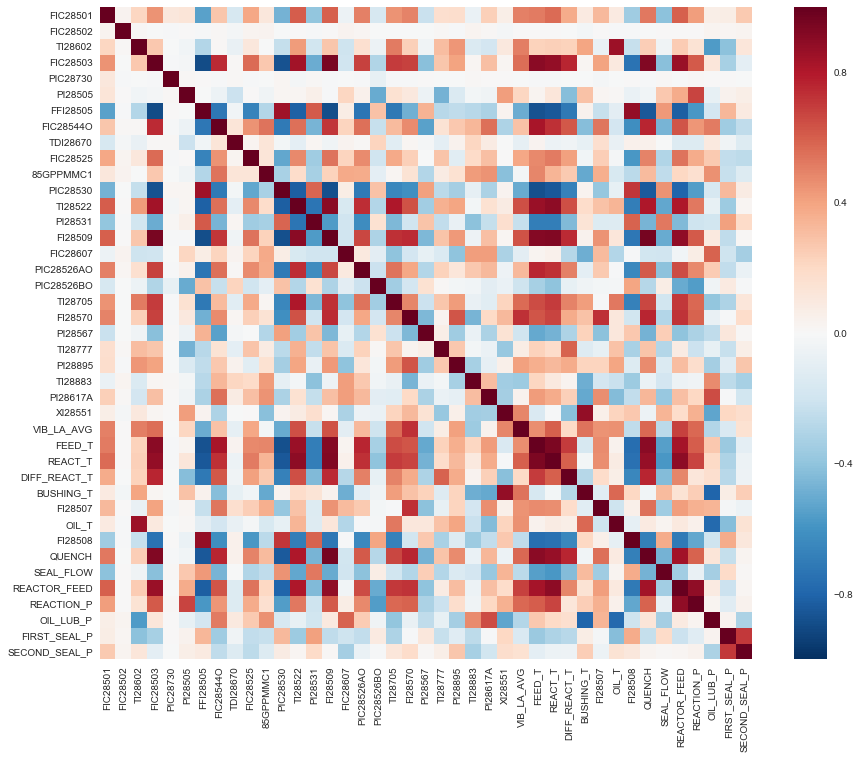

In [13]:
def get_corrmat(dataset, plot_size):
    corrmat = dataset.corr()
    f, ax = plt.subplots(figsize=plot_size)
    sns.heatmap(corrmat, square=True);
    print(corrmat.sort_values('VIB_LA_AVG')['VIB_LA_AVG'])

get_corrmat(train_norm, (15,12))

In [14]:
train_filtered = train_norm.copy()
train_filtered_corrmat = train_filtered.corr()

test_filtered = test_norm.copy()
    
for feature in list(train_filtered_corrmat):
    if abs(train_filtered_corrmat.loc['VIB_LA_AVG'][feature]) < 0.3:
        train_filtered.drop([feature], axis=1, inplace=True)
        test_filtered.drop([feature], axis=1, inplace=True)
        
print(train_filtered.shape)
print(test_filtered.shape)

(7074, 23)
(6465, 23)


PIC28530       -0.502698
FFI28505       -0.497671
TI28883        -0.361251
PIC28526AO      0.323364
FIC28525        0.386244
PI28895         0.406289
FI28507         0.446837
OIL_T           0.454868
FEED_T          0.467291
XI28551         0.487982
FIC28501        0.504249
TI28602         0.507930
BUSHING_T       0.541166
FIC28503        0.557483
TI28705         0.563725
QUENCH          0.573498
REACTION_P      0.574415
REACT_T         0.598656
FI28509         0.634996
TI28522         0.642083
REACTOR_FEED    0.684317
FI28570         0.734008
VIB_LA_AVG      1.000000
Name: VIB_LA_AVG, dtype: float64


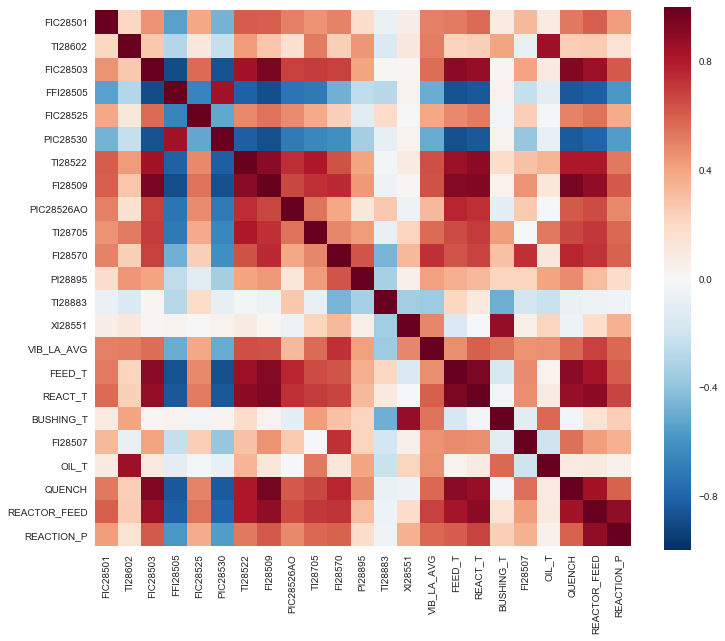

In [15]:
get_corrmat(train_filtered, (12, 10))

INV_CORR             -0.685227
PIC28530             -0.502698
FFI28505             -0.497671
TI28883              -0.361251
PIC28526AO            0.323364
FIC28525              0.386244
PI28895               0.406289
FI28507               0.446837
OIL_T                 0.454868
FEED_T                0.467291
XI28551               0.487982
FIC28501              0.504249
TI28602               0.507930
BUSHING_T             0.541166
FIC28503              0.557483
BUSHING_OIL_T         0.561579
TI28705               0.563725
QUENCH                0.573498
REACTION_P            0.574415
REACT_T               0.598656
UNIT_FEED             0.601273
FI28509               0.634996
TI28522               0.642083
REACTOR_CONDITIONS    0.664494
REACTOR_FEED          0.684317
FI28570               0.734008
COMPRESSOR_POWER      0.750926
VIB_LA_AVG            1.000000
Name: VIB_LA_AVG, dtype: float64


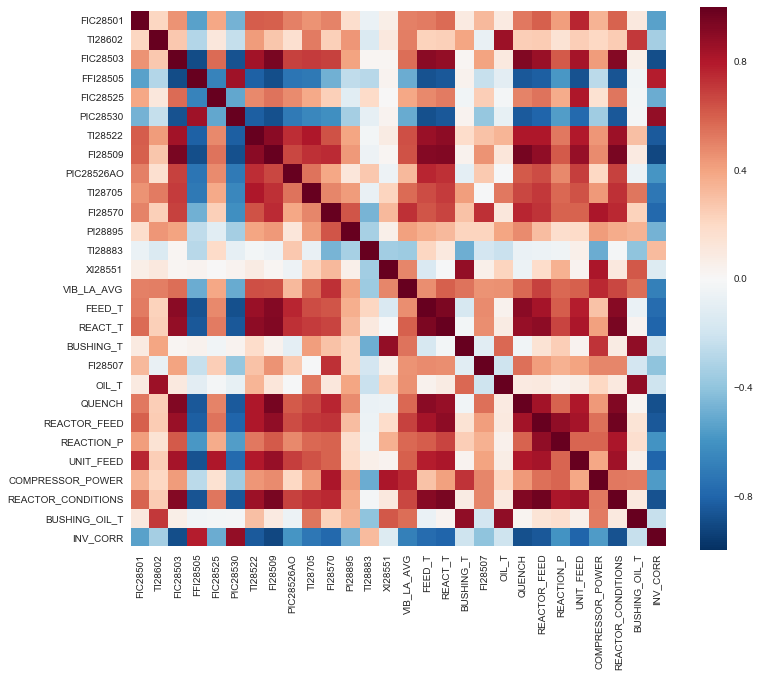

In [16]:
## Creating Features ###

## Now let's try to come up with some new features
train = train_filtered.copy()

# Unit Feed
train['UNIT_FEED'] = train_norm[['FIC28501', 'FIC28503', 'FIC28525']].mean(axis=1)

# Compressor Power (Steam flow and rotation of compressor are related)
train['COMPRESSOR_POWER'] = train_norm[['FI28570', 'XI28551']].mean(axis=1)

# Quench flow, reactor feed flow, reactor pressure, makeup flow and reactor temperature
train['REACTOR_CONDITIONS'] = train_filtered[['REACT_T', 'QUENCH', 'REACTOR_FEED', 
                                              'REACTION_P', 'FI28509']].mean(axis=1)

# Bushing and Oil temperatures
train['BUSHING_OIL_T'] = train_filtered[['BUSHING_T', 'OIL_T']].mean(axis=1)
    
# Joining negative correlated features
train['INV_CORR'] = train_filtered[['FFI28505', 'TI28883', 'PIC28530']].mean(axis=1)
    
get_corrmat(train, (12, 10))

INV_CORR             -0.685227
BUSHING_OIL_T         0.561579
UNIT_FEED             0.601273
TI28522               0.642083
REACTOR_CONDITIONS    0.664494
COMPRESSOR_POWER      0.750926
VIB_LA_AVG            1.000000
Name: VIB_LA_AVG, dtype: float64


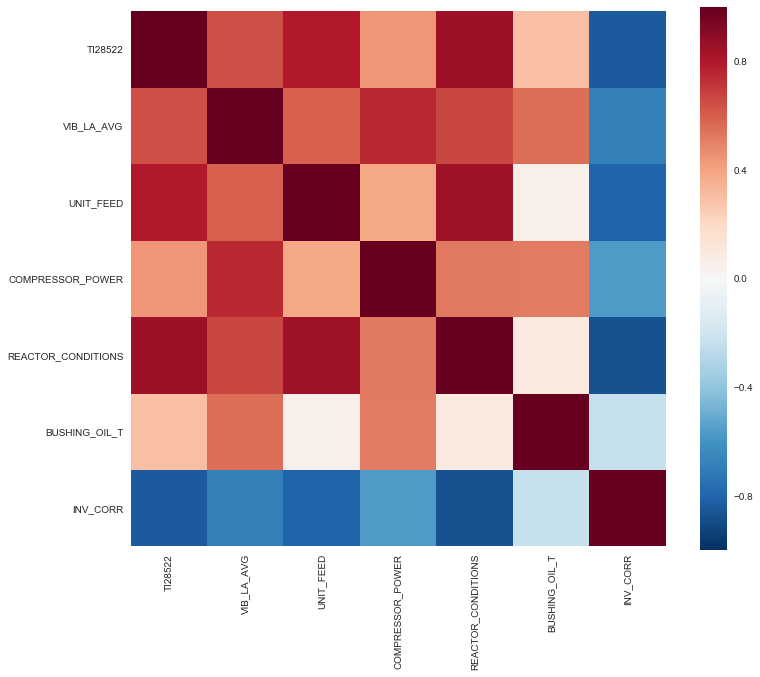

In [17]:
final_train = train.drop(['FIC28501', 'FIC28503', 'REACT_T', 'FIC28525','QUENCH', 
                          'REACTOR_FEED','REACTION_P', 'FI28509', 'BUSHING_T', 'OIL_T',
                          'XI28551', 'FI28570', 'TI28602', 'PIC28526AO', 'TI28883', 'PIC28530',
                          'TI28883', 'FFI28505', 'PI28895', 'TI28705', 'FI28507', 'FEED_T'], axis=1)

get_corrmat(final_train, (12, 10))

In [18]:
final_test = test_filtered.copy()

# Unit Feed
final_test['UNIT_FEED'] = test_filtered[['FIC28501', 'FIC28503']].mean(axis=1)

# Compressor Power (Steam flow and rotation of compressor are related)
final_test['COMPRESSOR_POWER'] = test_norm[['FI28570', 'XI28551']].mean(axis=1)

# Quench flow, reactor feed flow, reactor pressure, makeup flow and reactor temperature
final_test['REACTOR_CONDITIONS'] = test_filtered[['REACT_T', 'QUENCH', 'REACTOR_FEED', 
                                              'REACTION_P', 'FI28509']].mean(axis=1)

# Bushing and Oil temperatures
final_test['BUSHING_OIL_T'] = test_filtered[['BUSHING_T', 'OIL_T']].mean(axis=1)
    
# Joining negative correlated features
final_test['INV_CORR'] = test_filtered[['FFI28505', 'TI28883', 'PIC28530']].mean(axis=1)


for feature in list(final_test):
    if feature not in list(final_train):
        final_test.drop([feature], axis=1, inplace=True)
        
print(final_train.shape)
print(final_test.shape)

(7074, 7)
(6465, 7)


Coefficients: 
 [-0.08671694  0.32346054  0.41077377  0.28728935  0.40637785 -0.07011355]
Mean squared error: 0.37
Variance score: 0.63


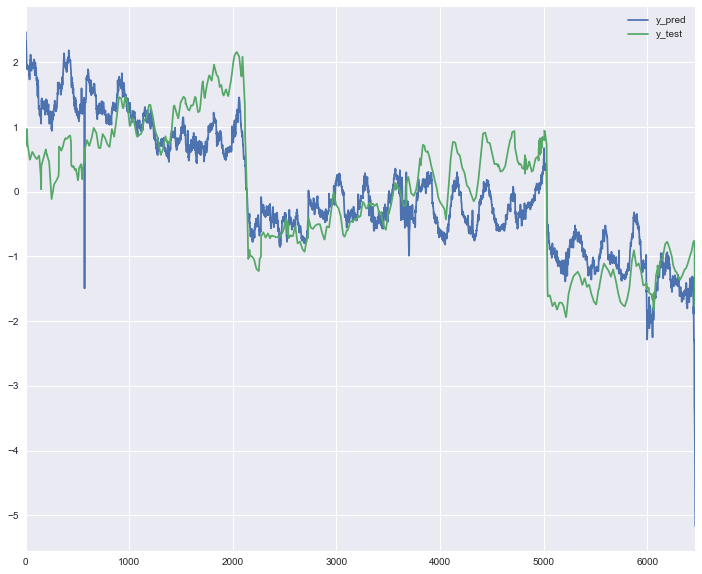

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Preparing dataset for training
y_train = final_train['VIB_LA_AVG']
X_train = final_train.drop(['VIB_LA_AVG'], axis=1)

y_test = final_test['VIB_LA_AVG']
X_test = final_test.drop(['VIB_LA_AVG'], axis=1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
compare_y = pd.DataFrame(data=y_pred, columns=['y_pred'])
compare_y['y_test'] = y_test

compare_y.head()
compare_y.plot(figsize=(12,10))

In [20]:
# Next steps: Get a new dataset from 03/o4 on and test the model
# Organize the code to make it clear